In [1]:
import os
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from tqdm.notebook import tqdm

In [2]:
# custom imports
import sys

sys.path.append(os.path.abspath(os.path.join('..', '..', 'utils')))

In [3]:
colors = [
    'blue', 'green', 'red', 'cyan', 'magenta',
    'yellow', 'black', 'orange', 'purple', 'brown',
    'pink', 'grey', 'maroon', 'gold', 'chocolate',
    'aqua', 'darkviolet', 'crimson', 'navy', 'darkgreen',
    'peru', 'tan', 'seagreen', 'darkslategrey', 'teal'
]

In [4]:
# constants
A = 3e-4
use_precise_transform = False

## Let's load the data files

In [6]:
# define the particle data group which we want to run the algorithms on
pdg = 11
eta = 2.5

# get the respective datasets locations
data_dir = os.path.join('..', '..', '..', 'data')
root_dirs = {
    'ideal':
        os.path.join(data_dir, 'pdg{}'.format(pdg), 'pdg{}-n25-0.5to10GeV-{}eta'.format(pdg, eta)),
    'mat':
        os.path.join(data_dir, 'pdg{}'.format(pdg),
                     'pdg{}-n25-0.5to10GeV-{}eta-with-material-effects'.format(pdg, eta)),
    'odd-bfield':
        os.path.join(data_dir, 'pdg{}'.format(pdg),
                     'pdg{}-n25-0.5to10GeV-{}eta-non-homogenous-magnetic-field'.format(pdg, eta)),
    'mat-odd-bfield':
        os.path.join(data_dir, 'pdg{}'.format(pdg),
                     'pdg{}-n25-0.5to10GeV-{}eta-with-material-effects-non-' \
                     'homogenous-magnetic-field'.format(pdg, eta))
}


# read the hits files and dataset
hit_files = {
    _type: sorted([file for file in os.listdir(root_dir) if file.endswith("-hits.csv")])
    for _type, root_dir in root_dirs.items()
}
hit_dfs = {
    _type: [pd.read_csv(os.path.join(root_dirs[_type], file), dtype={'particle_id':str, 'geometry_id': str})
            for file in files]
    for _type, files in hit_files.items()
}

# read the initial files and dataset
initial_files = {
    _type: sorted([file for file in os.listdir(root_dir) if file.endswith("-particles_initial.csv")])
    for _type, root_dir in root_dirs.items()
}
initial_dfs = {
    _type: [pd.read_csv(os.path.join(root_dirs[_type], file), dtype={'particle_id':str, 'geometry_id': str})
            for file in files]
    for _type, files in initial_files.items()
}

# read the final files and dataset
final_files = {
    _type: sorted([file for file in os.listdir(root_dir) if file.endswith("-particles_final.csv")])
    for _type, root_dir in root_dirs.items()
}
final_dfs = {
    _type: [pd.read_csv(os.path.join(root_dirs[_type], file), dtype={'particle_id':str, 'geometry_id': str})
            for file in files]
    for _type, files in final_files.items()
}

## Let's pick an event at randrom for every case and plot the x-y and r-x views

In [7]:
num_events = 100
random.seed(682021)

# pick an event randomly for each case
random_event = random.choice(range(0, num_events))
ideal_df = hit_dfs['ideal'][random_event]
ideal_df['r'] = np.sqrt(np.square(ideal_df['tx']) + np.square(ideal_df['ty']))
ideal_df['phi'] = np.arctan2(ideal_df['ty'], ideal_df['tx'])
ideal_df['xy_track'] = ideal_df[['r','phi']].apply(lambda pair: (pair[0], pair[1]), 1)
ideal_df['rz_track'] = ideal_df[['r','tz']].apply(lambda pair: (-pair[0], pair[1]), 1)
print(f"Event chosen for the ideal simulation:\t\t\t\t\t\t{hit_files['ideal'][random_event]}")

random_event = random.choice(range(0, num_events))
mat_df = hit_dfs['mat'][random_event]
mat_df['r'] = np.sqrt(np.square(mat_df['tx']) + np.square(mat_df['ty']))
mat_df['phi'] = np.arctan2(mat_df['ty'], mat_df['tx'])
mat_df['xy_track'] = mat_df[['r','phi']].apply(lambda pair: (pair[0], pair[1]), 1)
mat_df['rz_track'] = mat_df[['r','tz']].apply(lambda pair: (-pair[0], pair[1]), 1)
print(f"Event chosen for the simulation with material effect:\t\t\t\t{hit_files['mat'][random_event]}")

random_event = random.choice(range(0, num_events))
odd_bfield_df = hit_dfs['odd-bfield'][random_event]
odd_bfield_df['r'] = np.sqrt(np.square(odd_bfield_df['tx']) + np.square(odd_bfield_df['ty']))
odd_bfield_df['phi'] = np.arctan2(odd_bfield_df['ty'], odd_bfield_df['tx'])
odd_bfield_df['xy_track'] = odd_bfield_df[['r','phi']].apply(lambda pair: (pair[0], pair[1]), 1)
odd_bfield_df['rz_track'] = odd_bfield_df[['r','tz']].apply(lambda pair: (-pair[0], pair[1]), 1)
print(f"Event chosen for the simulation with non-homogenous B:\t\t\t\t"
      f"{hit_files['odd-bfield'][random_event]}")

random_event = random.choice(range(0, num_events))
mat_odd_bfield_df = hit_dfs['mat-odd-bfield'][random_event]
mat_odd_bfield_df['r'] = np.sqrt(np.square(mat_odd_bfield_df['tx']) + np.square(mat_odd_bfield_df['ty']))
mat_odd_bfield_df['phi'] = np.arctan2(mat_odd_bfield_df['ty'], mat_odd_bfield_df['tx'])
mat_odd_bfield_df['xy_track'] = mat_odd_bfield_df[['r','phi']].apply(lambda pair: (pair[0], pair[1]), 1)
mat_odd_bfield_df['rz_track'] = mat_odd_bfield_df[['r','tz']].apply(lambda pair: (-pair[0], pair[1]), 1)
print(f"Event chosen for the simulation with material effect and non-homogenous B:\t"
      f"{hit_files['mat-odd-bfield'][random_event]}")

Event chosen for the ideal simulation:						event000000074-hits.csv
Event chosen for the simulation with material effect:				event000000017-hits.csv
Event chosen for the simulation with non-homogenous B:				event000000045-hits.csv
Event chosen for the simulation with material effect and non-homogenous B:	event000000003-hits.csv


In [8]:
from notebook1_utils import plot_views

dfs = [ideal_df, mat_df, odd_bfield_df, mat_odd_bfield_df]
types = ['"ideal"',
         '"with-material-effects"',
         '\n"non-homogenous-magnetic-field"',
         '\n"with-material-effects-and-non-homogenous-magnetic-field"'
        ]

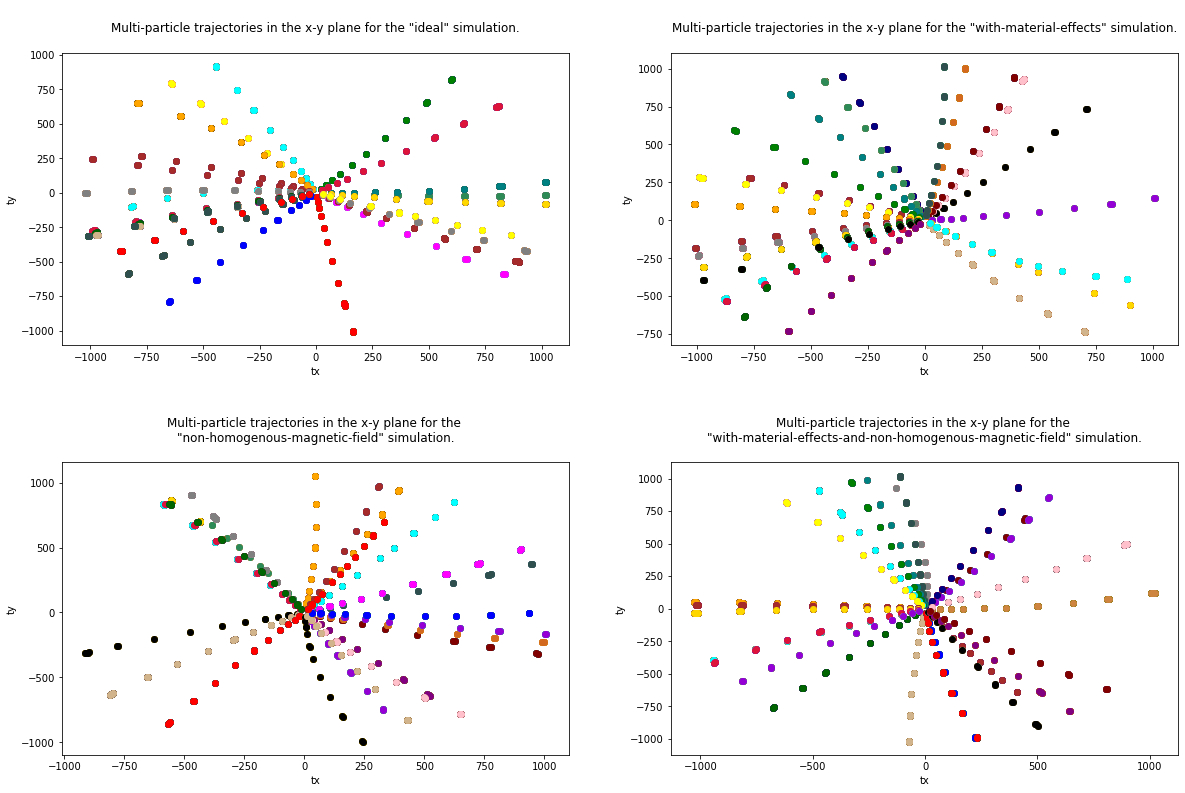

In [9]:
plot_views(dfs, types, 'tx', 'ty', 'x', 'y', colors)

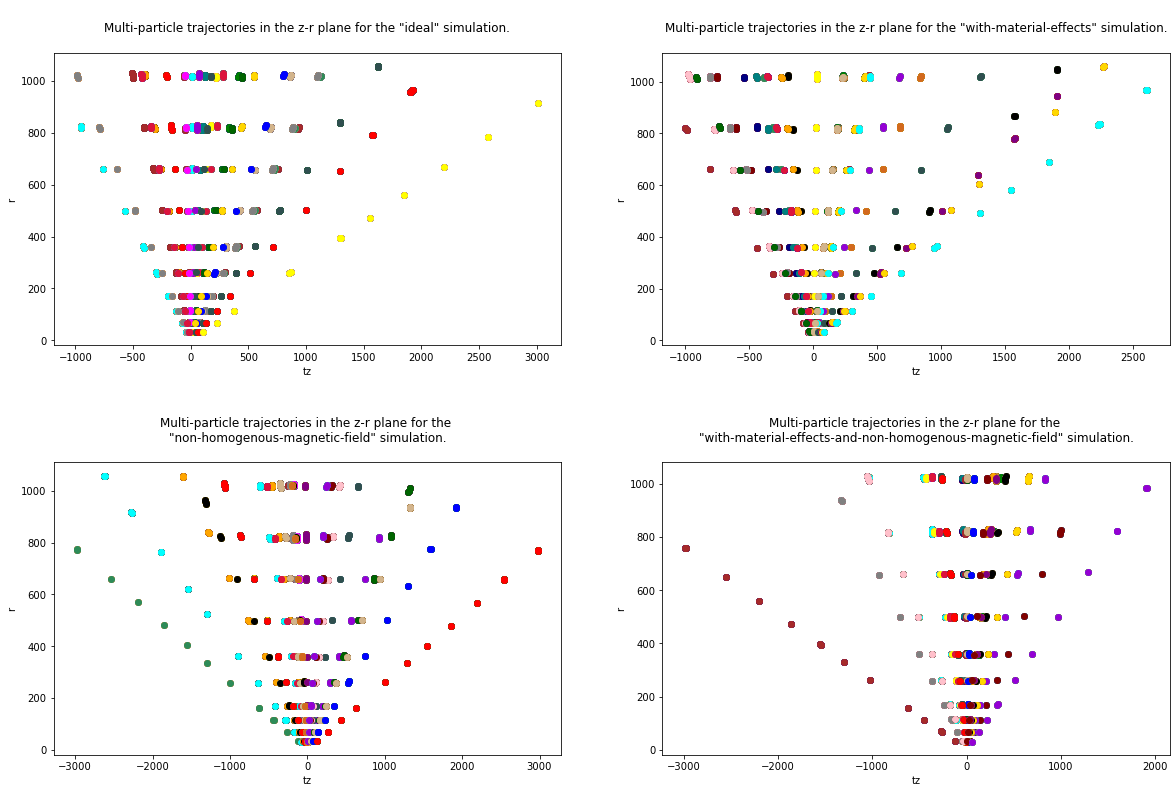

In [10]:
plot_views(dfs, types, 'tz', 'r', 'z', 'r', colors)

The distortion from the material effect and the non-homogenous magnetic field is not all that visible in these plots (at least to my eye). Let's take a look at the Hough Space also.

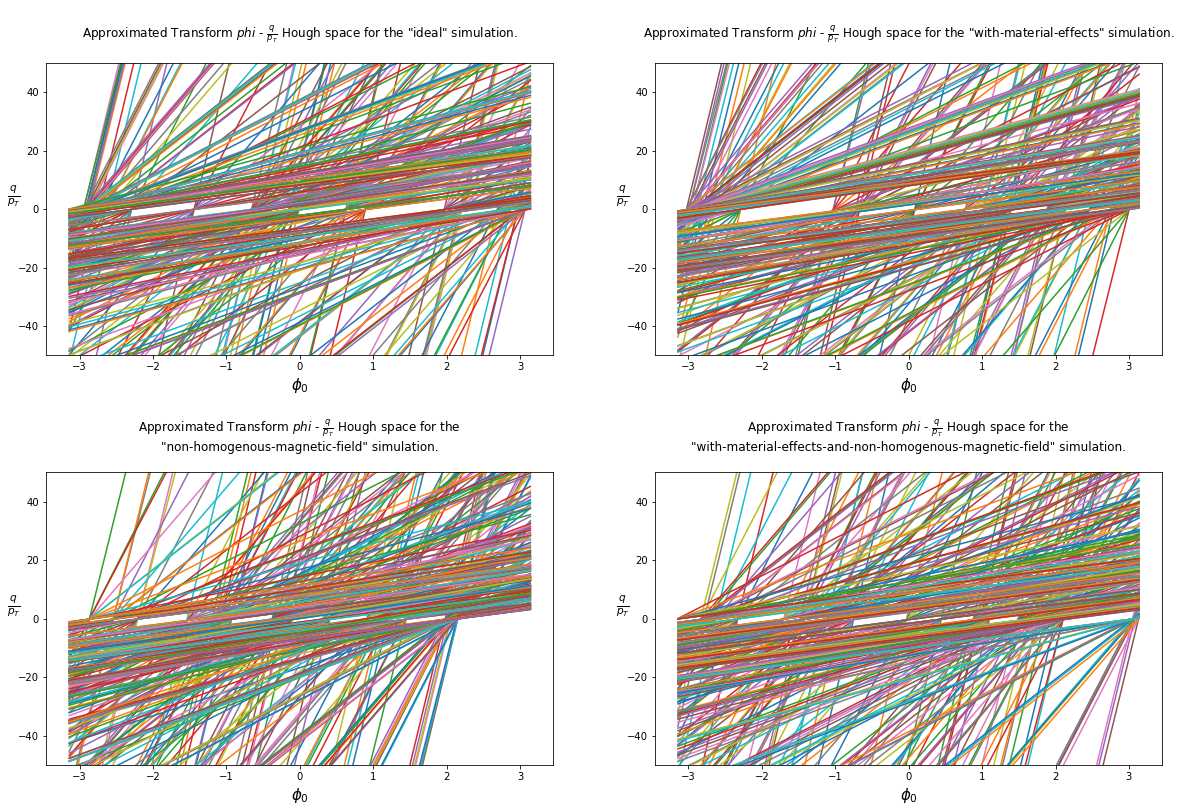

In [11]:
from notebook1_utils import plot_xy_hough

xrange = (-np.pi, np.pi)
ylims = (-50, 50)
plot_xy_hough(dfs, A, types, xrange, ylims)

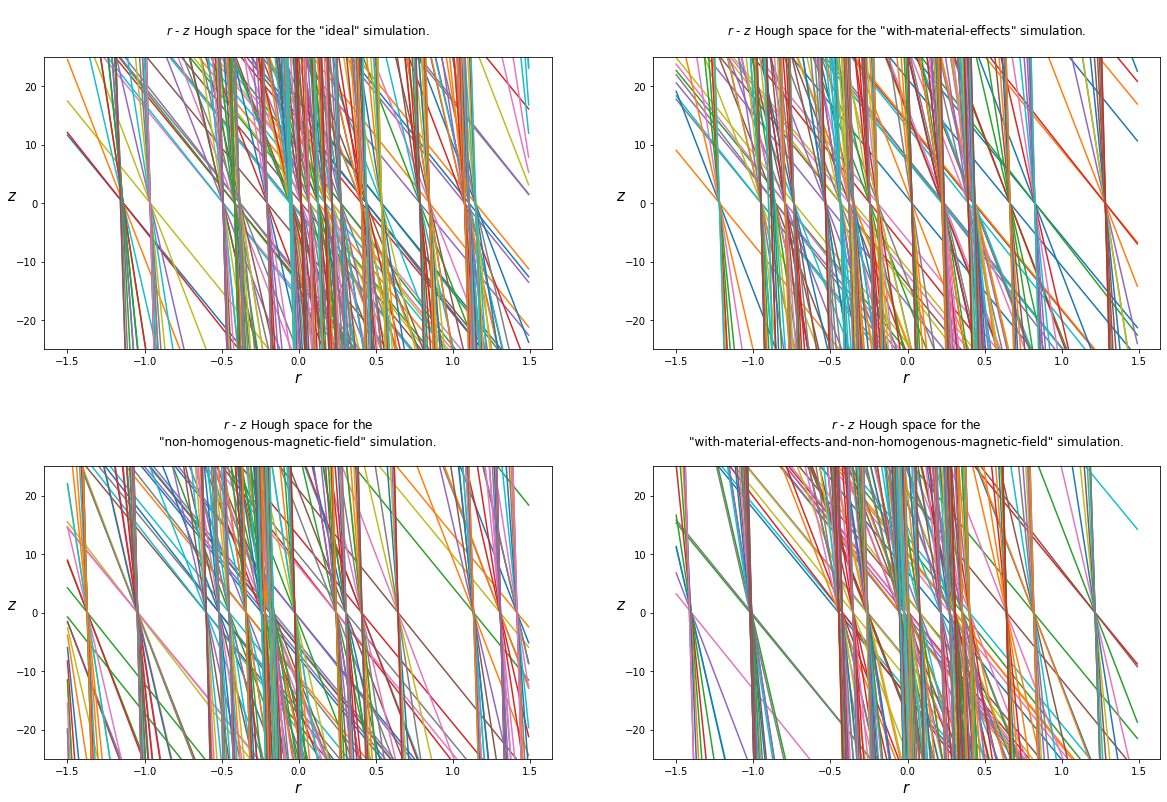

In [12]:
from notebook1_utils import plot_rz_hough

xrange = (-1.5, 1.5)
ylims = (-25, 25)
plot_rz_hough(dfs, types, xrange, ylims)

The `x_range` and `ylims` parameters above can be configured in order to zoom in on any part of the plots, in order to inspect it further. Now, we will apply the Hough Transforms over the whole datasets to see how the introduction of material and non-homogenous magnetic field will assess the performance of the algorothm.

# Let's apply the Hough Transform to the whole datasets

In [13]:
transforms = ['xy', 'rz', 'xy-rz-combo', 'rz-xy-combo']
evaluation_metrics = ['efficiency', 'fake', 'duplicate']
simulations = list(root_dirs.keys())

stats = {
    metric: {transform: {_type: 0 for _type in simulations} for transform in transforms}
    for metric in evaluation_metrics
}
stats

{'efficiency': {'xy': {'ideal': 0,
   'mat': 0,
   'odd-bfield': 0,
   'mat-odd-bfield': 0},
  'rz': {'ideal': 0, 'mat': 0, 'odd-bfield': 0, 'mat-odd-bfield': 0},
  'xy-rz-combo': {'ideal': 0, 'mat': 0, 'odd-bfield': 0, 'mat-odd-bfield': 0},
  'rz-xy-combo': {'ideal': 0, 'mat': 0, 'odd-bfield': 0, 'mat-odd-bfield': 0}},
 'fake': {'xy': {'ideal': 0, 'mat': 0, 'odd-bfield': 0, 'mat-odd-bfield': 0},
  'rz': {'ideal': 0, 'mat': 0, 'odd-bfield': 0, 'mat-odd-bfield': 0},
  'xy-rz-combo': {'ideal': 0, 'mat': 0, 'odd-bfield': 0, 'mat-odd-bfield': 0},
  'rz-xy-combo': {'ideal': 0, 'mat': 0, 'odd-bfield': 0, 'mat-odd-bfield': 0}},
 'duplicate': {'xy': {'ideal': 0,
   'mat': 0,
   'odd-bfield': 0,
   'mat-odd-bfield': 0},
  'rz': {'ideal': 0, 'mat': 0, 'odd-bfield': 0, 'mat-odd-bfield': 0},
  'xy-rz-combo': {'ideal': 0, 'mat': 0, 'odd-bfield': 0, 'mat-odd-bfield': 0},
  'rz-xy-combo': {'ideal': 0, 'mat': 0, 'odd-bfield': 0, 'mat-odd-bfield': 0}}}

In [14]:
# define the hyperparameters of the transforms
xy_hyperparams = {
    'bin-size': (0.005, 0.1),
    'xrange': (-np.pi, np.pi),
    'yrange': (-1000, 1000),
    'minimum-hits-per-bin': 10,
    'A': A,
    'use-precise-transform': False
}

rz_hyperparams = {
    'bin-size': (0.04, 10),
    'xrange': (-0.75, 0.75),
    'yrange': (-500, 500),
    'minimum-hits-per-bin': 12
}

In [15]:
from notebook1_utils import run_pipeline_over_whole_datasets

run_pipeline_over_whole_datasets(hit_dfs, stats, xy_hyperparams, rz_hyperparams)

Running the Hough Transform for the simulation type: ideal:   0%|          | 0/100 [00:00<?, ?it/s]

Running the Hough Transform for the simulation type: mat:   0%|          | 0/100 [00:00<?, ?it/s]

Running the Hough Transform for the simulation type: odd-bfield:   0%|          | 0/100 [00:00<?, ?it/s]

Running the Hough Transform for the simulation type: mat-odd-bfield:   0%|          | 0/100 [00:00<?, ?it/s]

In [16]:
stats

{'efficiency': {'xy': {'ideal': 88.67999999999999,
   'mat': 88.67999999999999,
   'odd-bfield': 88.47999999999999,
   'mat-odd-bfield': 88.47999999999999},
  'rz': {'ideal': 52.40000000000001,
   'mat': 52.40000000000001,
   'odd-bfield': 52.320000000000014,
   'mat-odd-bfield': 52.320000000000014},
  'xy-rz-combo': {'ideal': 92.24000000000001,
   'mat': 92.24000000000001,
   'odd-bfield': 92.12000000000002,
   'mat-odd-bfield': 92.12000000000002},
  'rz-xy-combo': {'ideal': 82.60000000000001,
   'mat': 82.60000000000001,
   'odd-bfield': 82.32000000000002,
   'mat-odd-bfield': 82.32000000000002}},
 'fake': {'xy': {'ideal': 2.728832295654753,
   'mat': 2.728832295654753,
   'odd-bfield': 3.221286037895606,
   'mat-odd-bfield': 3.221286037895606},
  'rz': {'ideal': 49.74673598300666,
   'mat': 49.74673598300666,
   'odd-bfield': 49.66699645342485,
   'mat-odd-bfield': 49.66699645342485},
  'xy-rz-combo': {'ideal': 6.636776787487953,
   'mat': 6.636776787487953,
   'odd-bfield': 7.14538

# Let's now aggregate the results in separate structures and plot them

In [17]:
from notebook1_utils import populate_rates

type_to_transform_efficiency_rate = populate_rates(stats['efficiency'], simulations, transforms)
type_to_transform_fake_rate = populate_rates(stats['fake'], simulations, transforms)
type_to_transform_duplicate_rate = populate_rates(stats['duplicate'], simulations, transforms)

In [18]:
from notebook1_utils import plot_rates

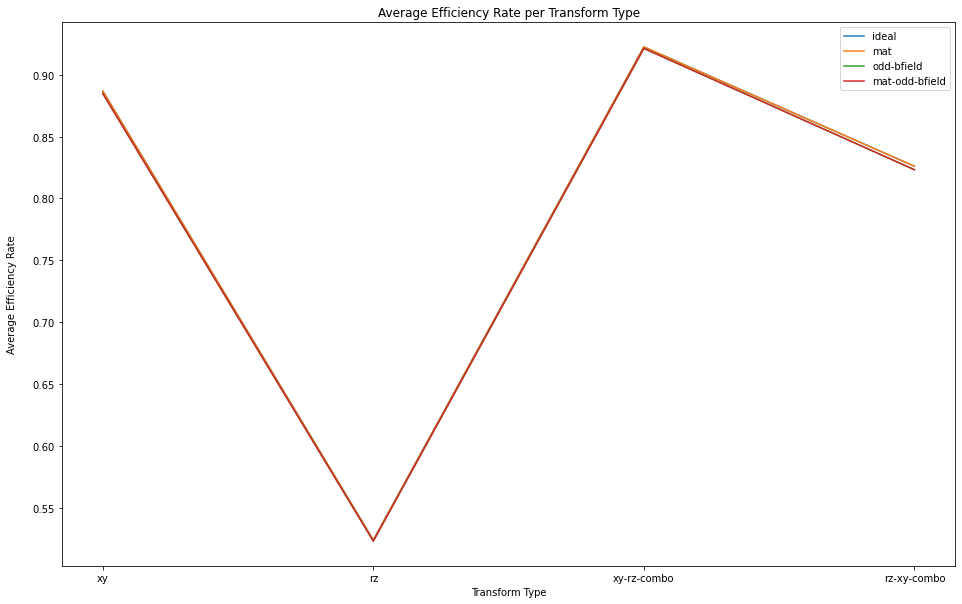

In [19]:
plot_rates(type_to_transform_efficiency_rate, simulations, 'Average Efficiency')

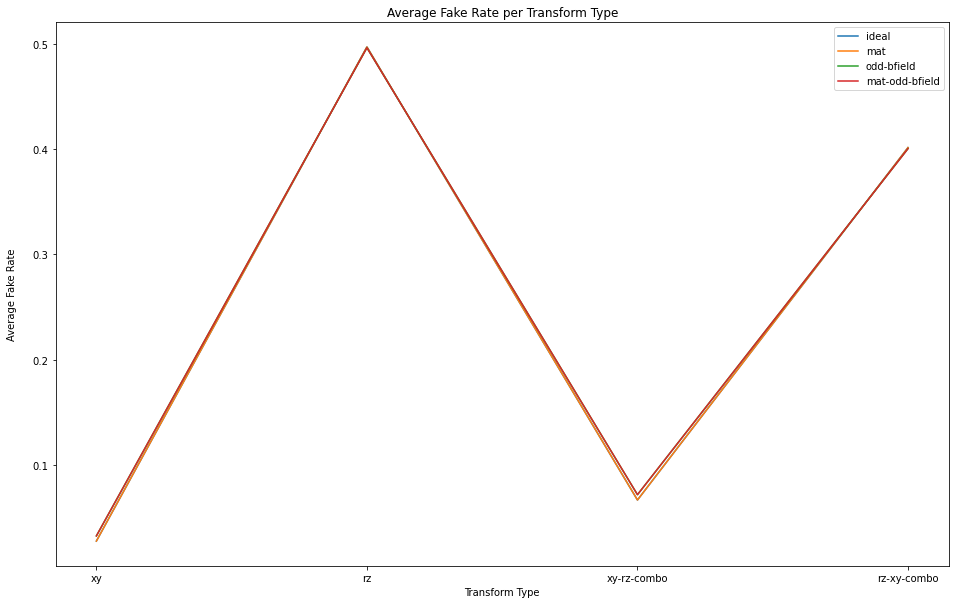

In [20]:
plot_rates(type_to_transform_fake_rate, simulations, 'Average Fake')

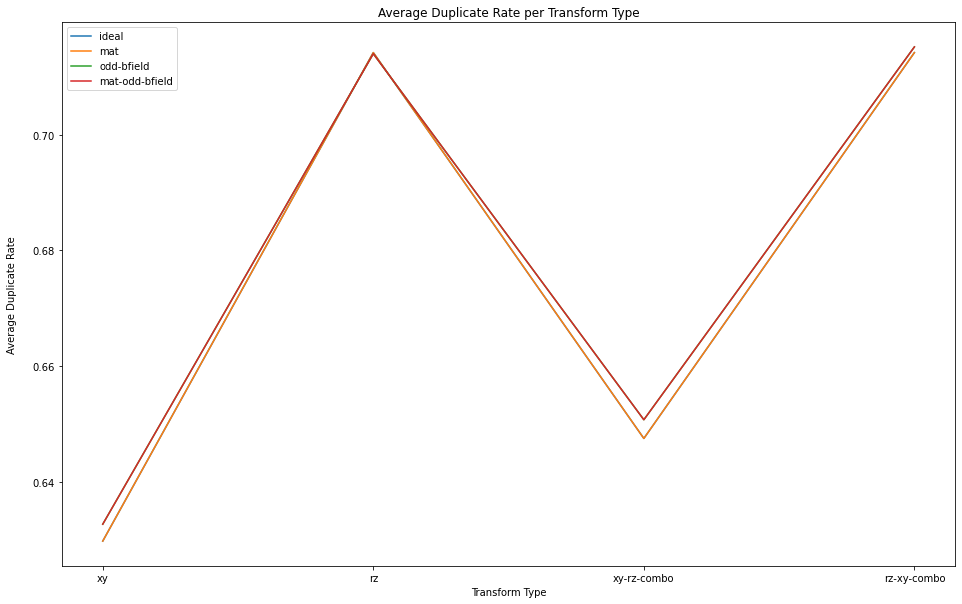

In [21]:
plot_rates(type_to_transform_duplicate_rate, simulations, 'Average Duplicate')

We notice that the xy-rz combination is performinst best, so we will stick with it.

# Now let's compute the rates as function of $\eta$ and $p_T$.

Predefine ranges in order to make my life easier.

In [ ]:
eta_min = -eta
eta_max = eta
eta_nbins = 10
eta_bin_length = (eta_max - eta_min) / eta_nbins
etas_range = np.arange(eta_min, eta_max + 1e-1, eta_bin_length)
eta_keys = ['{} – {}'.format(round(etas_range[i], 2), round(etas_range[i+1], 2))
            for i in range(0, len(etas_range) - 1)]

pt_min = 0
pt_max = 10
pt_nbins = 10
pt_bin_length = (pt_max - pt_min) / pt_nbins
pts_range = np.arange(pt_min, pt_max + 1e-1, pt_bin_length)
pt_keys = ['{} – {}'.format(round(pts_range[i], 2), round(pts_range[i+1], 2))
            for i in range(0, len(pts_range) - 1)]

Group all the common dataframes together.

In [ ]:
common_columns = hit_dfs['ideal'][0].columns
dfs_per_eta = {
    _type: {key: pd.DataFrame(columns=common_columns) for key in eta_keys} for _type in simulations
}

dfs_per_pt = {
    _type: {key: pd.DataFrame(columns=common_columns) for key in pt_keys} for _type in simulations
}

In [ ]:
from notebook1_utils import group_all_dfs_per_eta, group_all_dfs_per_pt

group_all_dfs_per_eta(hit_dfs, initial_dfs, dfs_per_eta, eta_min, eta_bin_length, eta_keys)
group_all_dfs_per_pt(hit_dfs, initial_dfs, dfs_per_pt, pt_min, pt_bin_length, pt_keys)

Define the statistics dictionaries and compute them.

In [ ]:
eta_stats = {
    metric: {_type: {key: 0 for key in eta_keys} for _type in simulations}
    for metric in evaluation_metrics
}

pt_stats = {
    metric: {_type: {key: 0 for key in pt_keys} for _type in simulations}
    for metric in evaluation_metrics
}

Compute them and then plot them.

In [ ]:
from notebook1_utils import compute_eta_stats, compute_pt_stats

compute_eta_stats(eta_stats, dfs_per_eta, xy_hyperparams, rz_hyperparams, eta_keys)
compute_pt_stats(pt_stats, dfs_per_pt, xy_hyperparams, rz_hyperparams, pt_keys)

In [ ]:
from notebook1_utils import plot_eta_stats, plot_pt_stats

In [ ]:
plot_eta_stats(eta_stats, eta_keys)

In [ ]:
plot_pt_stats(pt_stats, pt_keys)